In [238]:
from skimage import data, io, filters,feature
import matplotlib.pyplot as plt
import sys
from PIL import Image
import numpy as np
import osgeo
import gdal
import scipy.ndimage as nd
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.externals import joblib
from skimage.morphology import skeletonize
from sklearn.cluster import KMeans
#from collections import Sequence
#from itertools import chain, count

# Get Lat and Lon of geotifs

In [2]:
gtif8 = gdal.Open("/home/garth/aerobotics/BE MAC 8 814_2016-07-14_NIRcropped.tif")
gtif10 = gdal.Open("/home/garth/aerobotics/BE MAC 10 695_2016-07-14_NIRcropped.tif")
gtif3 = gdal.Open("/home/garth/aerobotics/BE MAC  3 695_2016-07-14_NIRcropped.tif")

gtifclipped3 = gdal.Open("/home/garth/aerobotics/clip_compressed_3.tif")
gtifclipped8 = gdal.Open("/home/garth/aerobotics/clip_compressed_8.tif")
gtifclipped10 = gdal.Open("/home/garth/aerobotics/clip_compressed_10.tif")

geoprojection3 = gtif3.GetGeoTransform()
geoprojection8 = gtif8.GetGeoTransform()
geoprojection10= gtif10.GetGeoTransform()

geoprojection3b= gtifclipped3.GetGeoTransform()
geoprojection8b= gtifclipped8.GetGeoTransform()
geoprojection10b= gtifclipped10.GetGeoTransform()

print geoprojection3
print geoprojection8
print geoprojection10

print ""
print "locations of tifs clipped in qgis:"
print ""

print geoprojection3b
print geoprojection8b
print geoprojection10b

(30.727018658644102, 4.630386240578264e-07, 0.0, -25.39700757416007, 0.0, -4.205807248474688e-07)
(30.72022361791424, 4.784727523799093e-07, 0.0, -25.39383421756554, 0.0, -4.346093393536248e-07)
(30.723794282453397, 4.5670402290631915e-07, 0.0, -25.3976435644717, 0.0, -4.148209230621604e-07)

locations of tifs clipped in qgis:

(30.72885553286574, 4.630386240578264e-07, 0.0, -25.39813641282556, 0.0, -4.205807248474688e-07)
(30.7223470799893, 4.784727523799093e-07, 0.0, -25.394880322245363, 0.0, -4.346093393536248e-07)
(30.72588416006222, 4.5670402290631915e-07, 0.0, -25.39976081046301, 0.0, -4.148209230621604e-07)


# Convert to Arrays in numpy

In [3]:
im = Image.open('/home/garth/aerobotics/clip_compressed_3.tif')
#im = Image.open('/home/garth/aerobotics/clip_compressed_8.tif')
#im = Image.open('/home/garth/aerobotics/clip_compressed_10.tif')

#im = Image.open('/home/garth/aerobotics/clip_compressed_3.tif')
#im = Image.open('/home/garth/aerobotics/BE MAC 8 814_2016-07-14_NIRcropped.tif')
#im = Image.open('/home/garth/aerobotics/clip_compressed_10.tif')


#im = Image.open('/home/garth/aerobotics/kmeans_model_small_cropped.tif')
im= np.array(im)

#im_np_array1 = np.array(im)
#im_np_array2 = np.array(im2)
#im_np_array3 = np.array(im3)

# Explore Bands:

In [ ]:
#print im_np_array1.shape

#red  = im[:,:,0]
#green= im[:,:,1]
#blue = im[:,:,2]

#red_im=Image.fromarray(red)
#green_im=Image.fromarray(green)
#blue_im=Image.fromarray(blue)

#red_im.save("/home/garth/red.jpg")
#green_im.save("/home/garth/green.jpg")
#blue_im.save("/home/garth/blue.jpg")

# Blur input

In [ ]:
#im_np_array1= nd.gaussian_filter(im_np_array1, sigma=0.1)
#im= nd.gaussian_filter(im, sigma=0.05)

# PCA transformation:

In [4]:
nx,ny,nbands=im.shape
print im.shape
im=im[:,:,0:3].reshape(-1, 3)  #Only takes r,g,b. Leaves out last band with no information
print im.shape

(4462, 5218, 4)
(23282716, 3)


In [5]:
#pca = IncrementalPCA(n_components = 3)
#pca_model=pca.fit(reshaped1)
#joblib.dump(pca_model, 'aero_pca_model.pkl',compress=True)

In [6]:
pca_model=joblib.load( 'aero_pca_model.pkl')
im = pca_model.transform(im)

In [ ]:
#pca_image1=im.reshape(nx,ny, 3)

In [ ]:
#pca_image1_normalized = np.copy(pca_image1)
#pca_image1_normalized -= pca_image1_normalized.min()
#pca_image1_normalized *= 255.0/(pca_image1_normalized.max())  

In [ ]:
#print type(pca_image1_normalized[0][0][0])
#print pca_image1_normalized.shape
#pca_image1_normalized=np.uint8(pca_image1_normalized)
#transformed_image=Image.fromarray(pca_image1_normalized)

In [ ]:
#im

In [ ]:
#transformed_image

# K-means:

In [ ]:
#clt = KMeans(n_clusters =30)
#clt_model=clt.fit(pca_data)
#clt_model=clt.fit(im)
#joblib.dump(clt_model, 'aero_kmeans_model15.pkl') 
#joblib.dump(clt_model, 'aero_kmeans_model30_pca.pkl.gz') 

In [7]:
#clt_model=joblib.load('aero_kmeans_model15_compressed2.pkl.gz') 
#clt_model=joblib.load('aero_kmeans_model30_rgb.pkl.gz')
clt_model=joblib.load('aero_kmeans_model30_pca.pkl.gz')

In [8]:
im=clt_model.predict(im)

In [9]:
im=im.reshape(nx,ny)

In [ ]:
#kmeans_image2 = np.copy(im)
#kmeans_image2 -= kmeans_image2.min()
#kmeans_image2 *= 255/(kmeans_image2.max())  
#print type(kmeans_image2[0][0])
#print kmeans_image2.shape
#kmeans_image2=np.uint8(kmeans_image2)

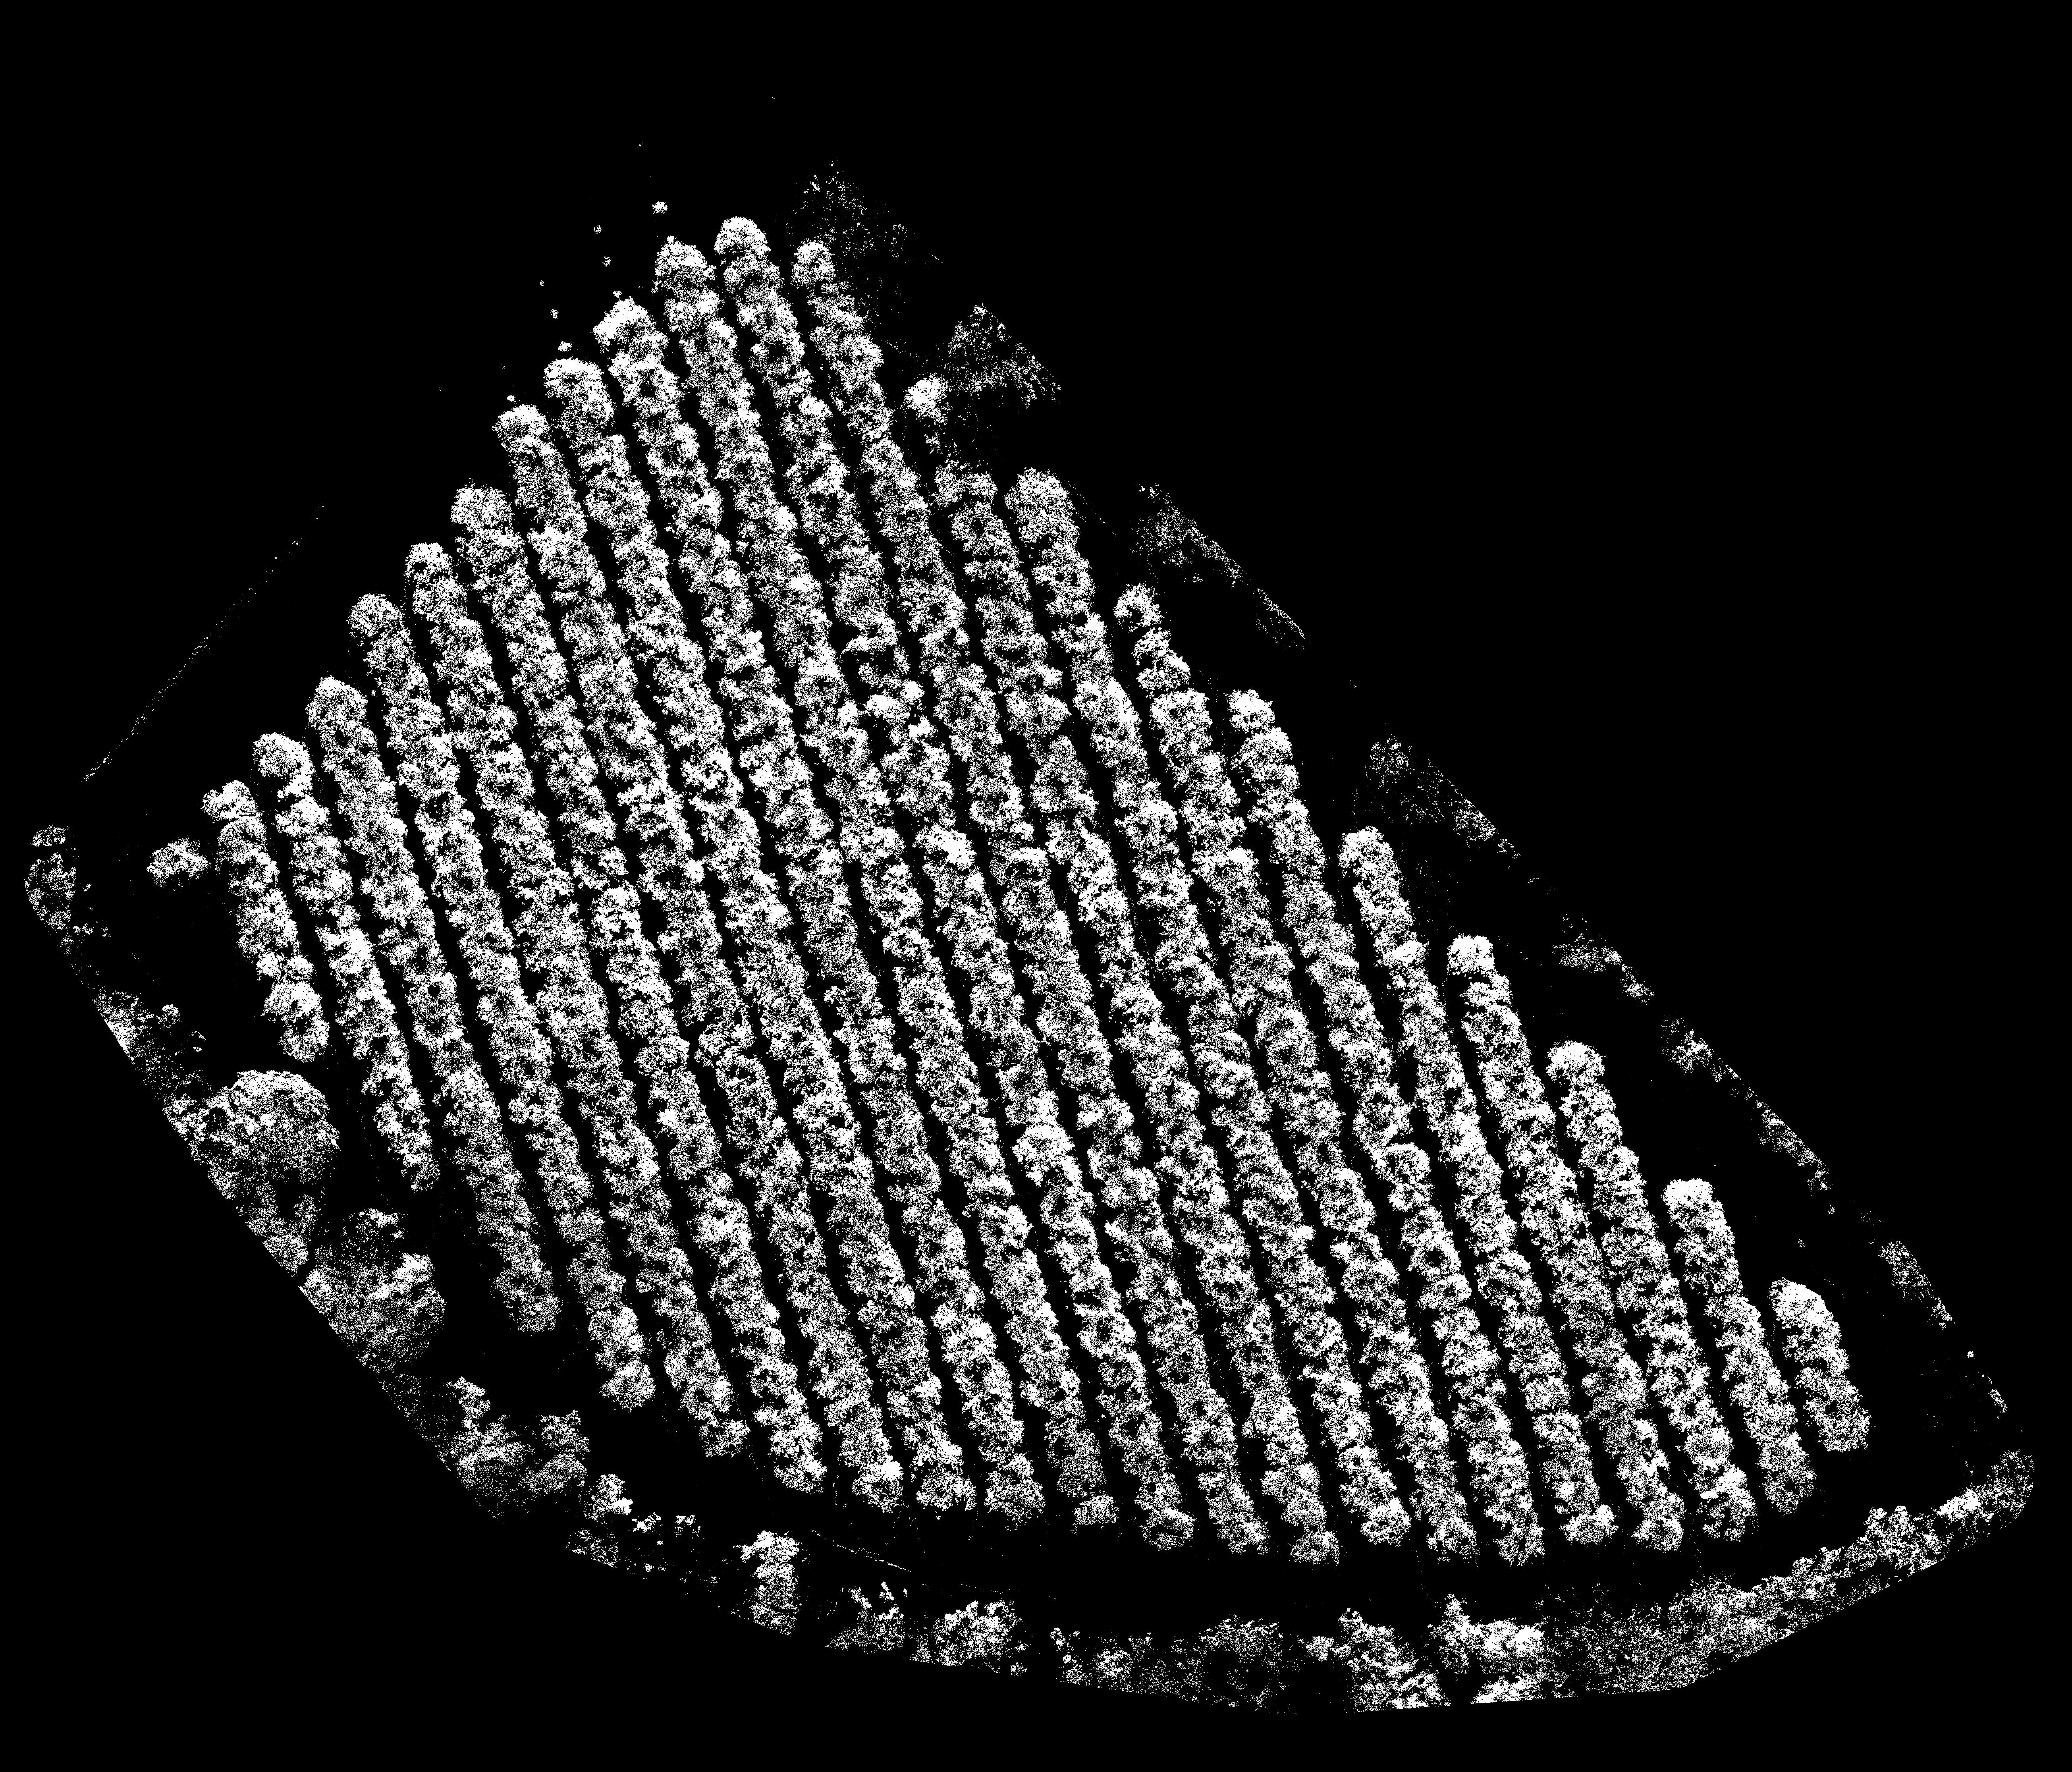

In [10]:
#cluster_list=[15]
#cluster_list=[4,6,8,16,17,21,24,29]    #14,19,20 are shaded leaves  #pca30
cluster_list=[4,6,8,16,17,19,21,24,29]    #14,19,20 are shaded leaves  #pca30
#cluster_list=[4,8,12,23,25,26]    #rgb30

c=(im==cluster_list[0] ).astype(int)
for i in cluster_list[1:]:
    c=c+ (im==i).astype(int)
c=np.uint8(c)

c *= 255
c_image=Image.fromarray(c)
c_image

In [ ]:
#label_objects, nb_labels = nd.label(c)
#sizes = np.bincount(label_objects.ravel())      # measures the size of every segmentation
#print np.mean(sizes)
#mask_sizes = sizes > 50                        # filters out small segmentations (noise)
#mask_sizes[0] = 0
#large_objs = mask_sizes[label_objects]          # filters out small segmentations
#large_objs=np.uint8(large_objs)
#large_objs *= 255

In [ ]:
#Image.fromarray(large_objs)

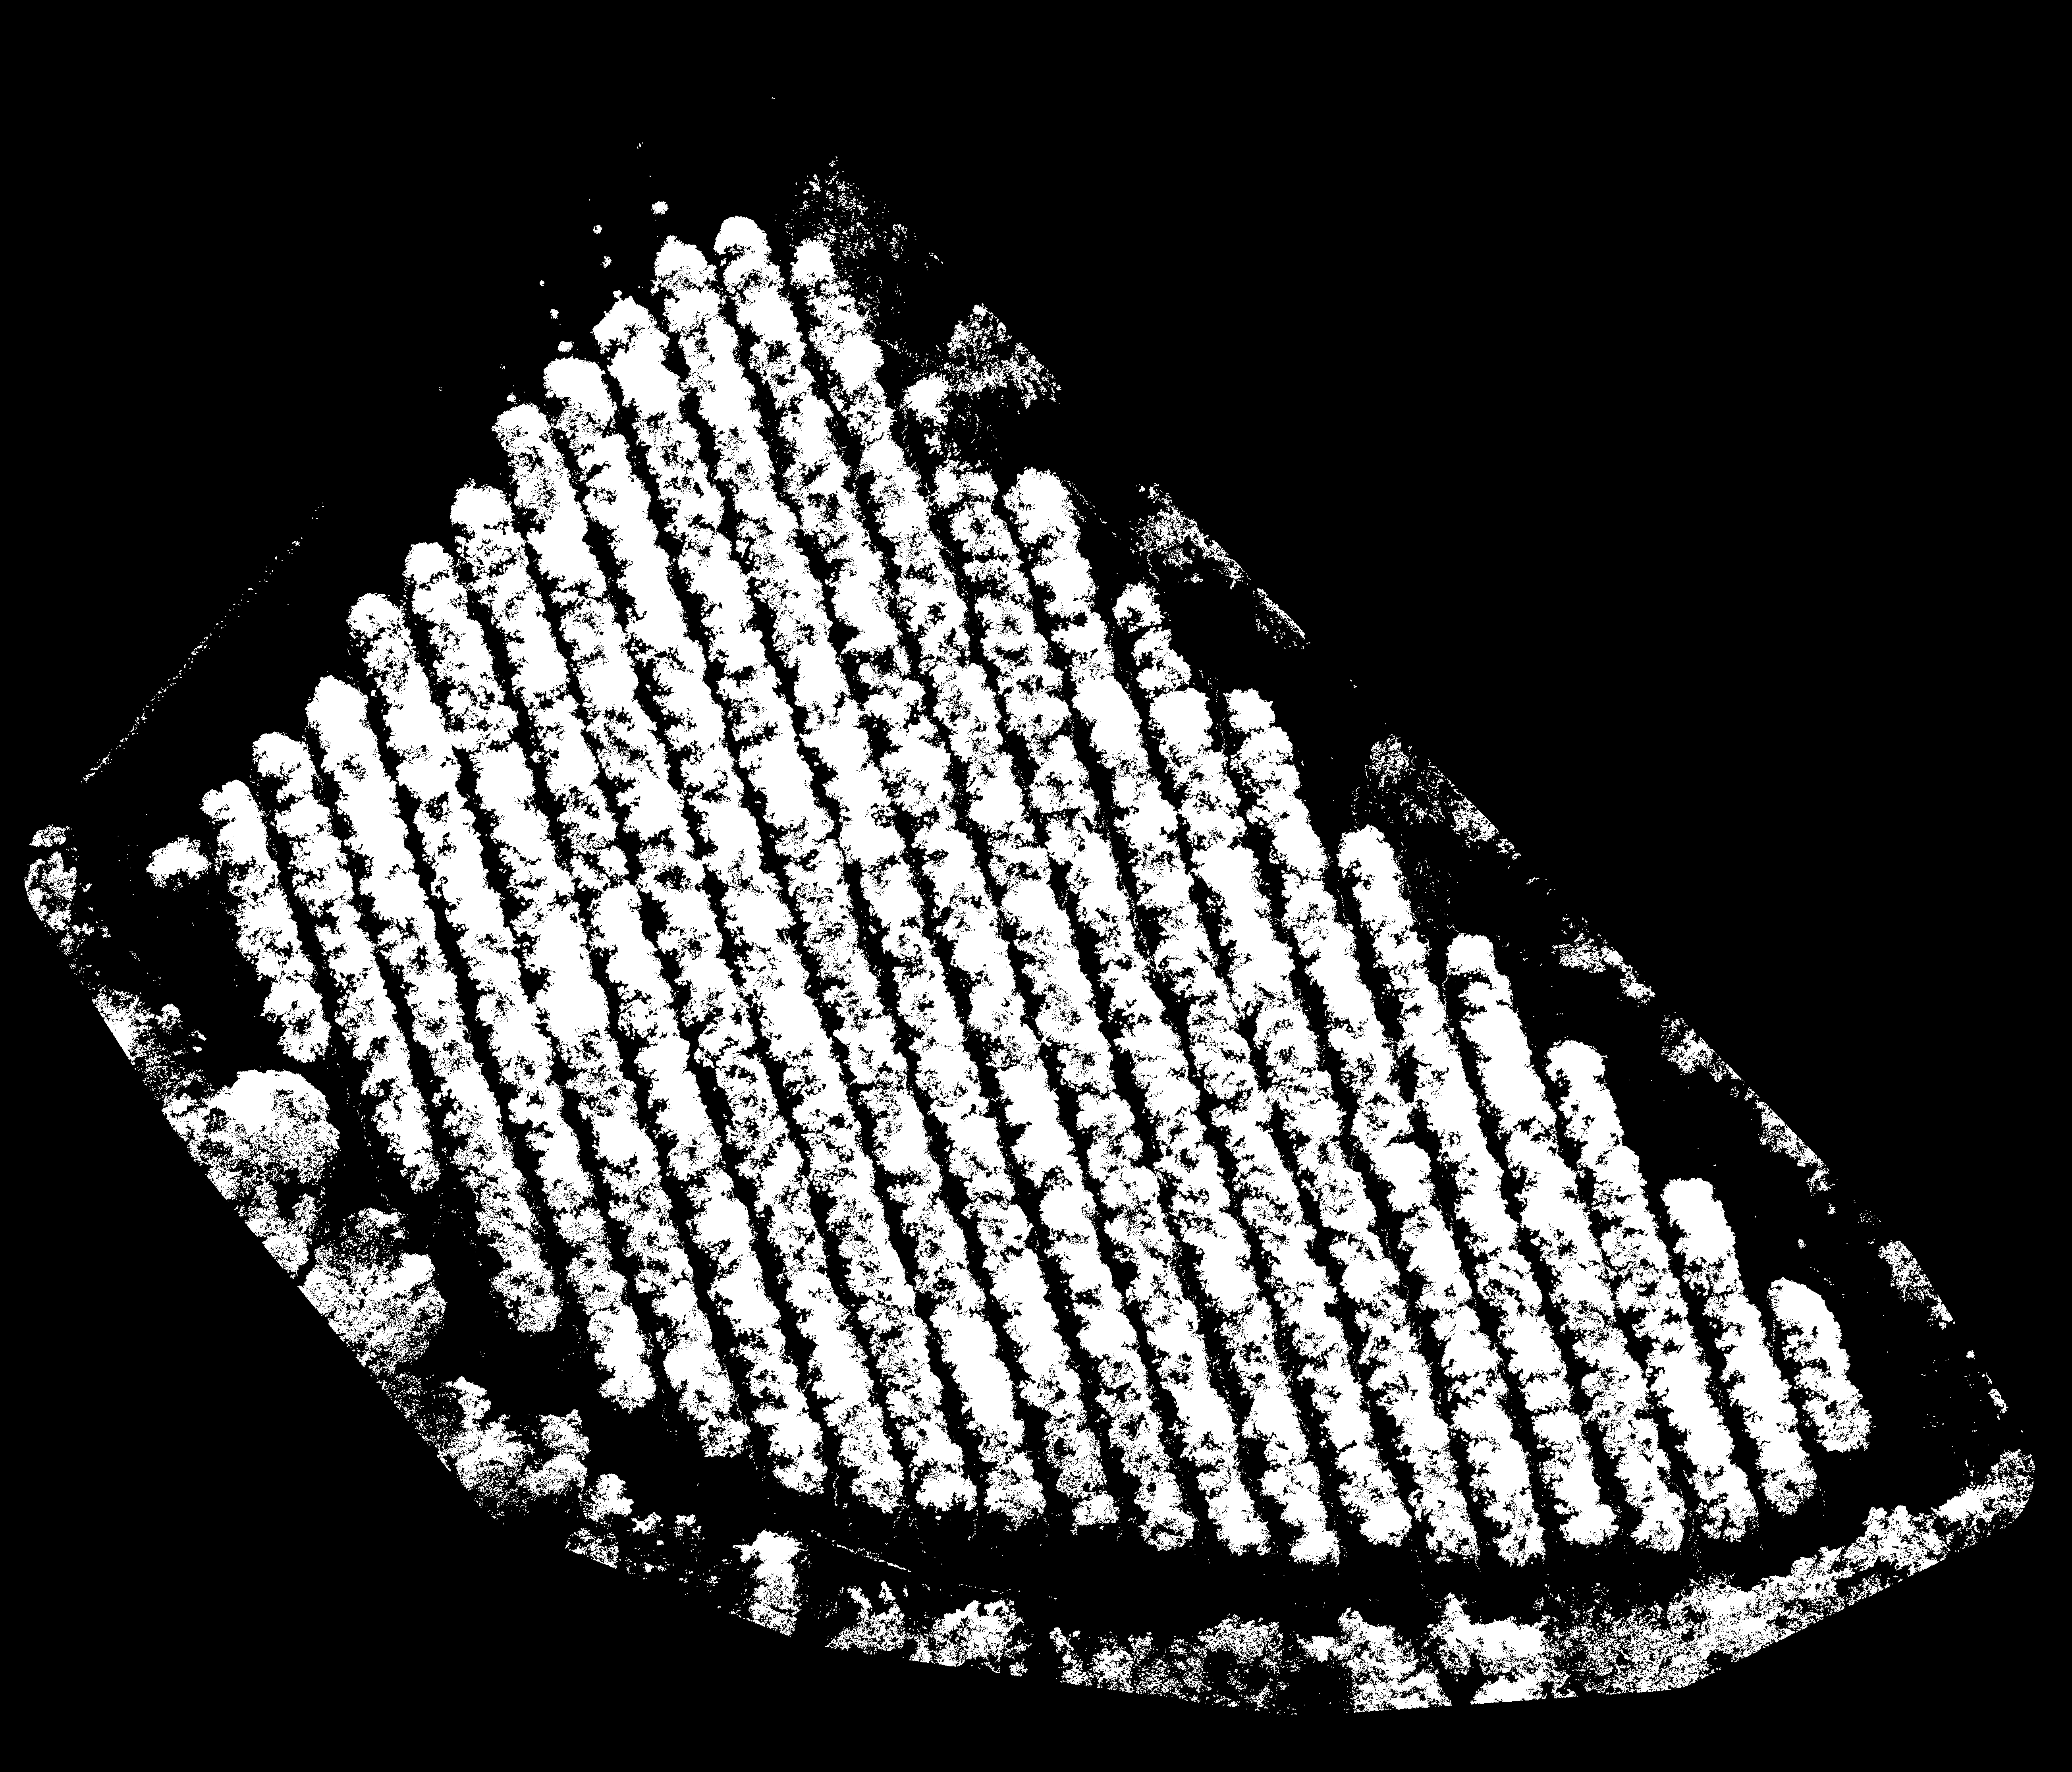

In [11]:
large_objs=nd.binary_fill_holes(c)
large_objs=np.uint8(large_objs)
large_objs*= 255

large_objs = nd.gaussian_filter(large_objs, sigma=0.5)

large_objs = (large_objs>10 ).astype(int)
large_objs=np.uint8(large_objs)
large_objs *= 255

Image.fromarray(large_objs)

# imput the tree size:
We make the assumption that the trees in an image are about the same size.
The signals that are less than a quarter of this size will be removed as noise.
Larger signals are probably overlapping trees and will be split up using k-means.

In [12]:
treeSize = 2.85
#treeSize = 1.38
#treeSize = 1.86

In [13]:
pixelsPerSquareMetre = 400   # Found by inspection (should use osgeo lib for this)

In [14]:
print pixelsPerSquareMetre

400


In [15]:
avgPixelsPerTree=pixelsPerSquareMetre*3.141*(treeSize**2)
print avgPixelsPerTree

10205.109


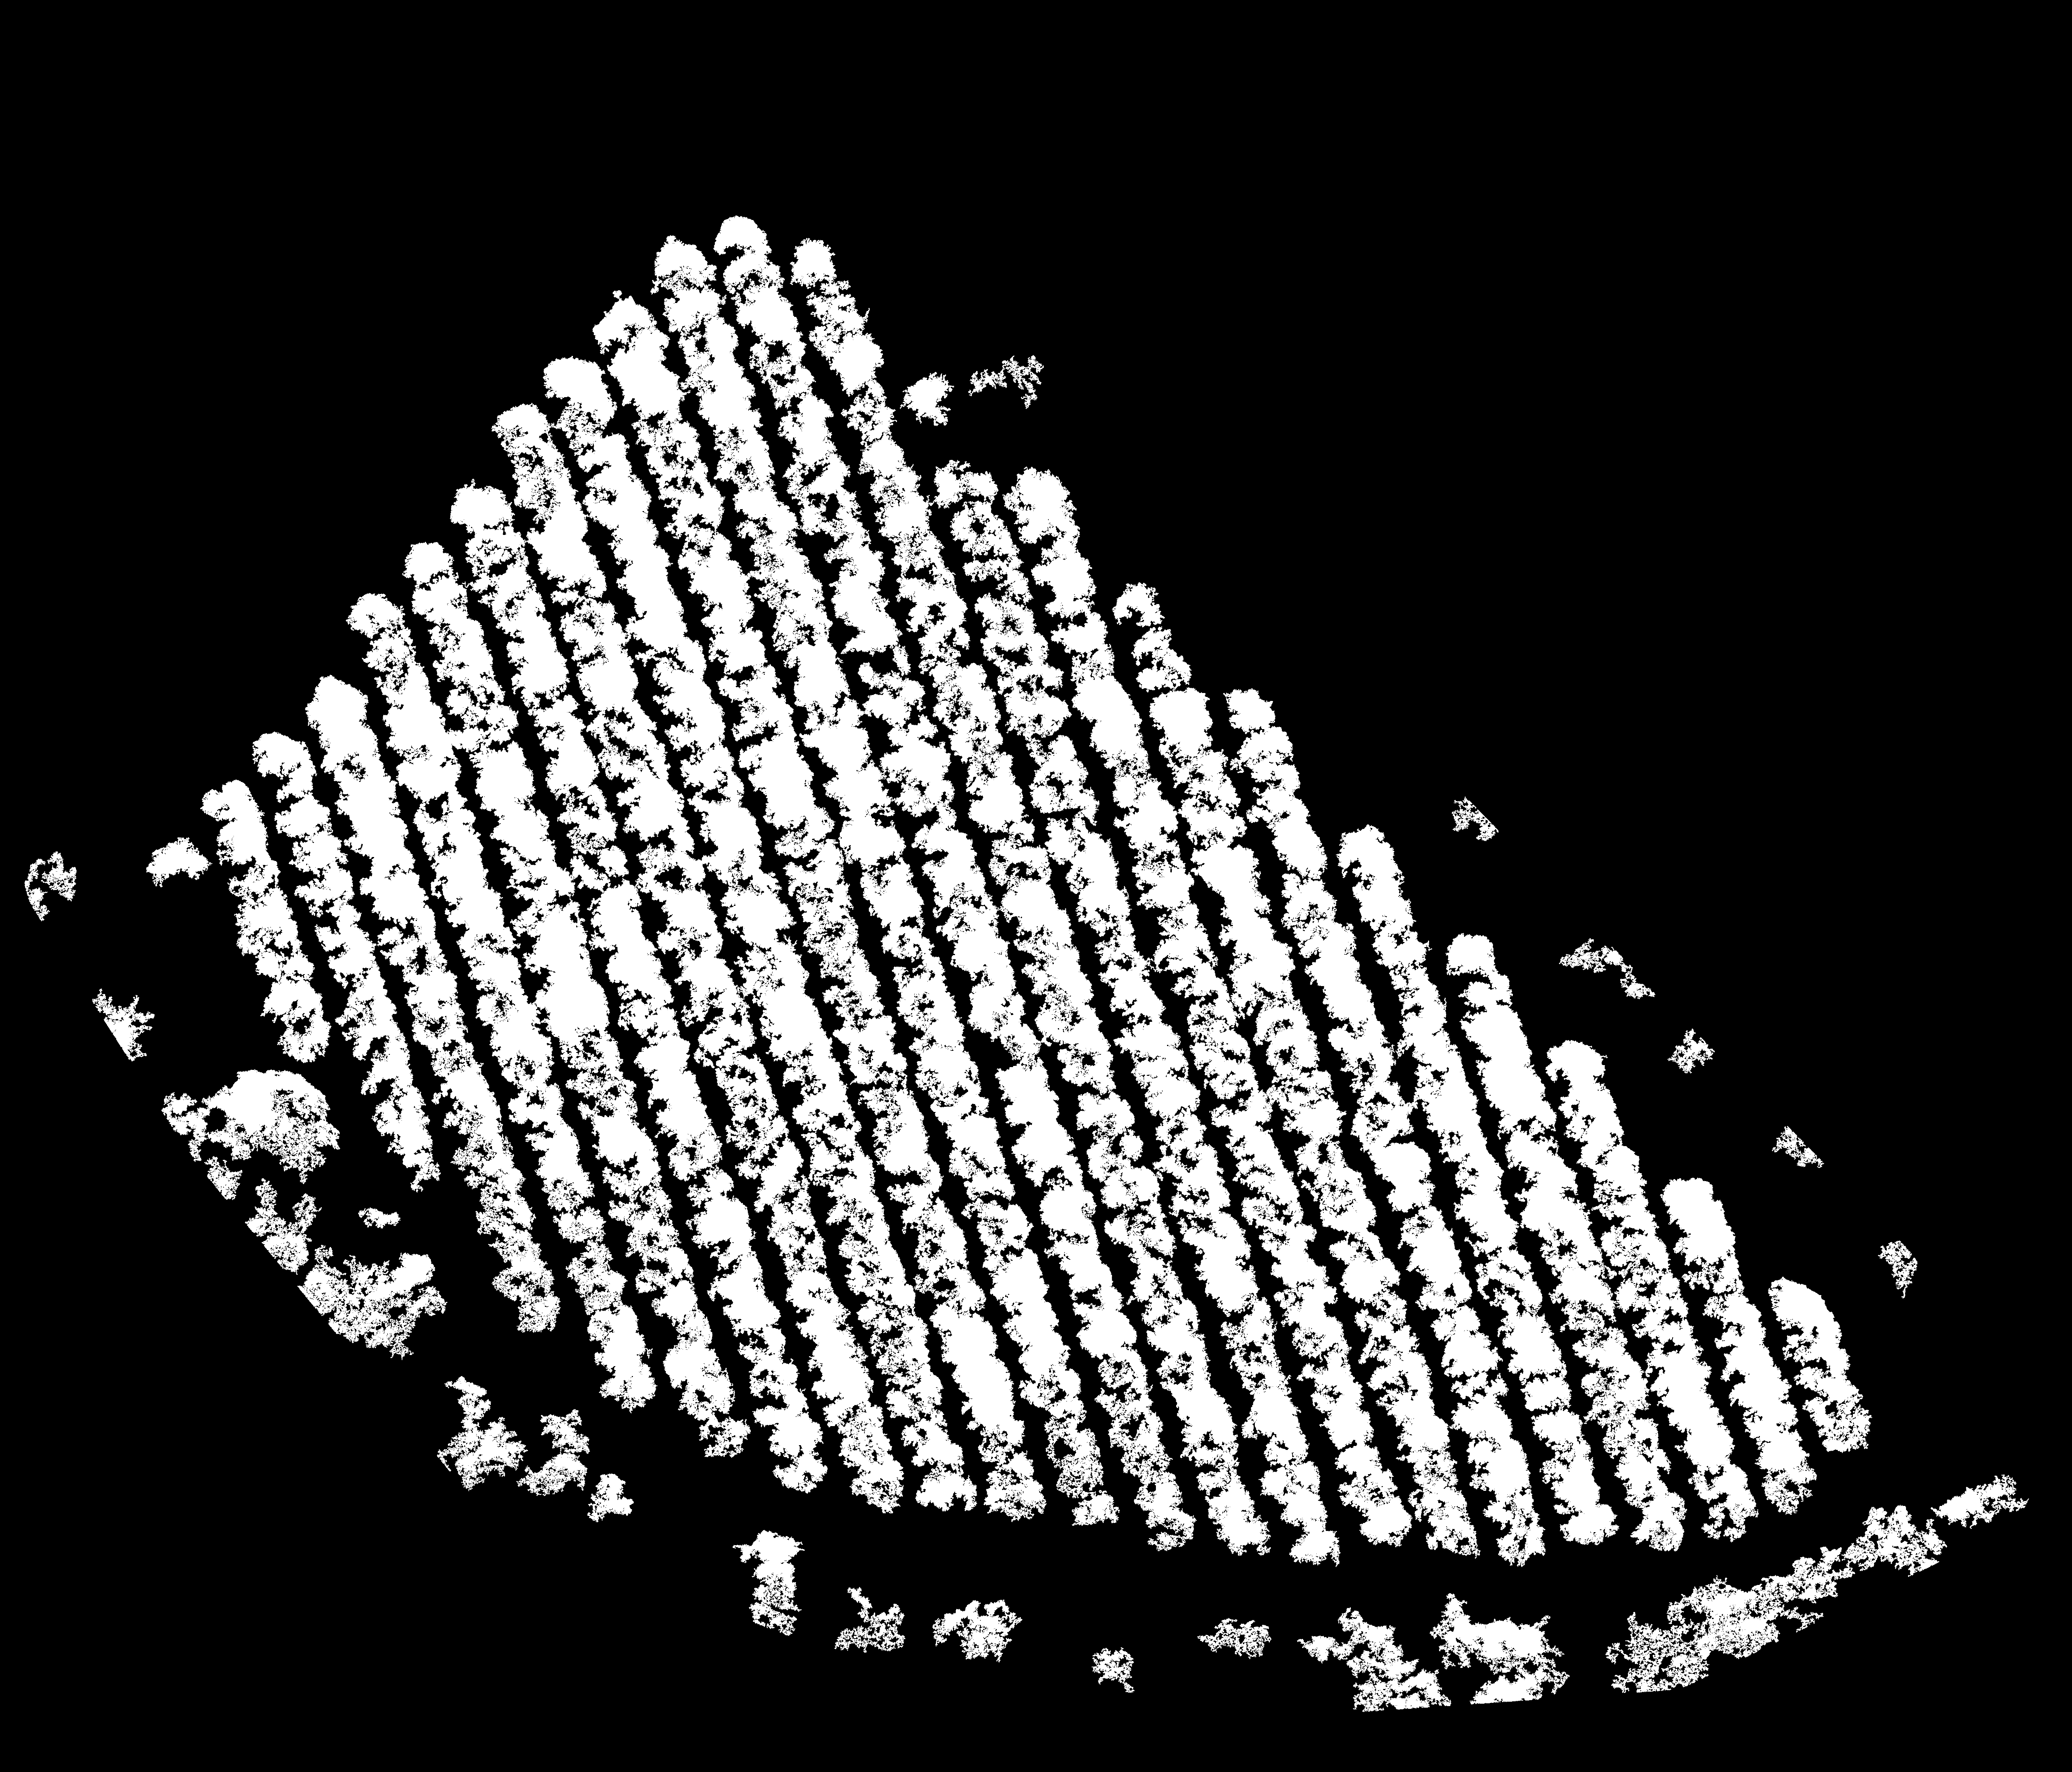

In [16]:
label_objects, nb_labels = nd.label(large_objs)
sizes = np.bincount(label_objects.ravel())      # measures the size of every segmentation
mask_sizes = sizes > (avgPixelsPerTree)/4                        # filters out small segmentations
mask_sizes[0] = 0
large_objs = mask_sizes[label_objects]          # filters out small segmentations
large_objs=np.uint8(large_objs)
large_objs *= 255
Image.fromarray(large_objs)

In [17]:
label_objects, nb_labels = nd.label(large_objs)

In [18]:
#avgTreeSize= 0
#numTrees   = nb_labels

#for i in range(0,numTrees):
#    cluster=np.where(label_objects == i)
#    size    = np.bincount(label_objects.flatten())[i]
#    avgTreeSize += size
    
#avgTreeSize=avgTreeSize/numTrees
#print avgTreeSize

456419


In [ ]:
#lat1=geoprojection10b[3]
#lon1=geoprojection10b[0]
#delta_lat=geoprojection10b[5]
#delta_lon=geoprojection10b[1]


#lat1=geoprojection8b[3]
#lon1=geoprojection8b[0]
#delta_lat=geoprojection8b[5]
#delta_lon=geoprojection8b[1]


lat1=geoprojection3b[3]
lon1=geoprojection3b[0]
delta_lat=geoprojection3b[5]
delta_lon=geoprojection3b[1]


def GetAvgPosAndSizeAndShape(i):
    cluster=np.where(label_objects == i)
    avg_lat = (np.mean(cluster[0])*delta_lat)+lat1
    avg_lon = (np.mean(cluster[1])*delta_lon)+lon1
    size    = np.bincount(label_objects.flatten())[i]
#    #radius= (size/3.141) ** (0.5)
    radius = size
#    x=(np.max(cluster[0])-np.min(cluster[0]))**2
#    y=(np.max(cluster[1])-np.min(cluster[1]))**2
#    length =((x)+(y))**0.5
#    roundness= (4*3.41*size)/length
#    #latlonradlist.append([avg_lat,avg_lon,radius])
#    return [avg_lat,avg_lon,radius,roundness]
    return [avg_lat,avg_lon,radius]
    
    
result=joblib.Parallel(n_jobs=7)(joblib.delayed(GetAvgPosAndSizeAndShape)(i) for i in range(1,nb_labels)) 
#result=joblib.Parallel(n_jobs=7)(joblib.delayed(GetAvgPosAndSizeAndShape)(i) for i in range(1,100)) 



#np.savetxt("./10ouput1.csv", result, delimiter=",", header="lat,lon,radius,roundness",comments='')
#np.savetxt("./8ouput1.csv", result, delimiter=",", header="lat,lon,radius,roundness",comments='')
np.savetxt("./3ouput1.csv", result, delimiter=",", header="lat,lon,radius,roundness",comments='')

In [239]:
depth = lambda L: isinstance(L, list) and max(map(depth, L))+1

In [243]:
lat1=geoprojection3b[3]
lon1=geoprojection3b[0]
delta_lat=geoprojection3b[5]
delta_lon=geoprojection3b[1]

def KMeansOnSegment(cluster,size,im):
    nClusters = int(size/avgPixelsPerTree)
    if nClusters==0:
        nClusters=1
    print nClusters

    x=im
    x*=255

    clt = KMeans(n_clusters =nClusters)
    (a,b) = np.where(x==255)
    inputList=[list(x) for x in zip(a,b)]
    clt_model = clt.fit(inputList)
    
    answer = clt_model.predict(inputList)
    answer=zip(a,b,answer)
    answer=np.array([list(x) for x in answer])

    clusterCentres=[]
    for j in range(0,nClusters):
        avgy=0
        avgx=0
        count=0
        for i in range(0,len(answer)):
            if(answer[i][2]==j):
                avgx += answer[i][0]
                avgy += answer[i][1]
                count +=1
        avgx = avgx/count
        avgy = avgy/count
        
        avg_lat = ((avgx)*delta_lat)+lat1
        avg_lon = ((avgy)*delta_lon)+lon1
        
        #clusterCentres.append((avgx,avgy,count))
        clusterCentres.append([avg_lat,avg_lon,count])
    
    #clusterCentres=([list(x) for x in clusterCentres])[0]
    #clusterCentres = [list(x) for x in clusterCentres]

    return clusterCentres


def GetAvgPosAndSize2(i):
    cluster=np.where(label_objects == i)
    avg_lat = (np.mean(cluster[0])*delta_lat)+lat1
    avg_lon = (np.mean(cluster[1])*delta_lon)+lon1
    size    = np.bincount(label_objects.flatten())[i]
    if (size>2*avgPixelsPerTree):
        print "a"
        answer = KMeansOnSegment(cluster,size,np.uint8(label_objects==i))
        #print len(answer)
        #print len(answer[0])
        #print type(answer)
        #print type(answer[0])
        #print type(answer[0][0])
        return answer
    else:
        print "b"
        return [avg_lat,avg_lon,size]
    
result=joblib.Parallel(n_jobs=4)\
  (joblib.delayed(GetAvgPosAndSize2)(i)\
    for i in range(1,nb_labels))
    #for i in range(4,6)) 

print ""
flatList=[]    
for item in result:
    if (depth(item)==1):
        flatList.append(item)
    else:
        for item2 in item:
            flatList.append(item2)
    
    
np.savetxt("./3ouput2.csv", flatList, delimiter=",", header="lat,lon,radius",comments='')

a
b
141
b
a
109
a
a
15
3
a
53
b
a
3
a
17
a
38
a
10
a
7
b
b
b
b
a
9
b
a
30
b
b
b
a
5
b
b
a
7
a
8
b
a
7
b
a
3
b
a
4
a
4
a
2
a
3
b
b
b
b
b
a
7
b
a
2
b
a
3
b
a
3
b



In [232]:
print type(result)
print len(result)
print "@0"
print len(result[0])
print type(result[0][0])
print type(result[0])
print "@1"
print len(result[1])
print type(result[1][0])
print type(result[1])
#print "@2"
#print len(result[2])
#print type(result[2][0])
#print type(result[2])


print result
print ""
print result[1]
print ""
print result[1][0]

<type 'list'>
2
@0
3
<type 'numpy.float64'>
<type 'list'>
@1
3
<type 'numpy.float64'>
<type 'list'>
[[-25.398557785744437, 30.72993792229887, 9362], [-25.398720178871649, 30.72949221097382, 8936]]

[-25.398720178871649, 30.72949221097382, 8936]

-25.3987201789


In [196]:
np.savetxt("./3ouput2.csv", result, delimiter=",", header="lat,lon,radius",comments='')

In [33]:
 np.bincount(label_objects.flatten())

array([17931328,  1448475,     6611,  1119943,     9362,   155343,
          31640,   544399,     8096,    39213,   180425,   391169,
         110007,    73627,     4221,    10273,     4170,     4503,
          92264,     3237,   315580,     7765,     9429,     4671,
          57088,     3996,     4347,    80132,    90962,    15943,
          74773,     2827,    39326,     4765,    44396,    46703,
          22691,    34726,     6428,     8832,     7324,    12340,
           6315,    81262,     2565,    20733,     9484,    38870,
          15479,    32034,     7315,     5309])

In [132]:
lat1=geoprojection3b[3]
lon1=geoprojection3b[0]
delta_lat=geoprojection3b[5]
delta_lon=geoprojection3b[1]

i=18
cluster=np.where(label_objects == i)
avg_lat = (np.mean(cluster[0])*delta_lat)+lat1
avg_lon = (np.mean(cluster[1])*delta_lon)+lon1
size    = np.bincount(label_objects.flatten())[i]
clustIm=np.uint8(label_objects==i)

nClusters = int(size/avgPixelsPerTree)
if nClusters==0:
    nClusters=1
print nClusters

x=np.uint8(label_objects==i)
x*=255

clt = KMeans(n_clusters =nClusters)
(a,b) = np.where(x==255)
inputList=[list(x) for x in zip(a,b)]
clt_model = clt.fit(inputList)

92264
9
(4462, 5218)
[2158 2158 2159 ..., 3023 3023 3024]
[2268 2271 2266 ..., 2542 2543 2542]
[[2158, 2271], [2159, 2266], [2159, 2267], [2159, 2268], [2159, 2269], [2159, 2270], [2159, 2271], [2159, 2272], [2160, 2265]]


In [143]:
answer = clt_model.predict(inputList)
answer=zip(a,b,answer)
answer=np.array([list(x) for x in answer])

clusterCentres=[]
for j in range(0,nClusters):
    avgy=0
    avgx=0
    count=0
    for i in range(0,len(answer)):
        if(answer[i][2]==j):
            avgx += answer[i][0]
            avgy += answer[i][1]
            count +=1
    avgx = avgx/count
    avgy = avgy/count
    clusterCentres.append((avgx,avgy,count))
    
clusterCentres=np.array([list(x) for x in clusterCentres])
print clusterCentres

[[ 2286  2263  8665]
 [ 2871  2452 11582]
 [ 2378  2287  8097]
 [ 2583  2361 11411]
 [ 2965  2485  9768]
 [ 2686  2378 12749]
 [ 2221  2233  8299]
 [ 2779  2416 10351]
 [ 2487  2321 11342]]


In [112]:
#x=np.uint8(label_objects==1)
#x*=255
#Image.fromarray(x)

In [ ]:
edges = feature.canny(c, sigma=1)
edges
#edges=np.uint8(edges)
#edges *= 255
#Image.fromarray(edges)

d=nd.binary_fill_holes(edges)
d=np.uint8(d)
d *= 255
#Image.fromarray(c+d)

In [ ]:
label_objects, nb_labels = nd.label(c+d)
sizes = np.bincount(label_objects.ravel())      # measures the size of every segmentation
mask_sizes = sizes > 100                        # filters out small segmentations
mask_sizes[0] = 0
large_objs = mask_sizes[label_objects]          # filters out small segmentations
large_objs=np.uint8(large_objs)
large_objs *= 255

large_objs = nd.gaussian_filter(large_objs, sigma=1)      # smoothe filter for denoising
large_objs= (large_objs>10 ).astype(int)
large_objs = np.uint8(large_objs)
large_objs *= 255

In [ ]:
label_objects, nb_labels = nd.label(large_objs)
sizes = np.bincount(label_objects.ravel())      # measures the size of every segmentation
mask_sizes = sizes > 100                        # filters out small segmentations
mask_sizes[0] = 0

In [ ]:
label_objects[2000,2019]
print type(label_objects[0][0])

In [ ]:
print nb_labels
print len(label_objects)

In [ ]:
#print nx,ny
#print nb_labels
#print np.bincount(label_objects.flatten())
#print np.where(label_objects == 2)


avgx=np.mean(np.where(label_objects == 2)[0])
avgy=np.mean(np.where(label_objects == 2)[1])
print avgx,avgy

In [ ]:
geoprojection3b

In [ ]:
latlonradlist=[]
lat1=geoprojection3b[3]
lon1=geoprojection3b[0]
delta_lat=geoprojection3b[5]
delta_lon=geoprojection3b[1]
for i in range(1,nb_labels):
    avg_lat = (np.mean(np.where(label_objects == i)[0])*delta_lat)+lat1
    avg_lon = (np.mean(np.where(label_objects == i)[1])*delta_lon)+lon1
    size=np.bincount(label_objects.flatten())[i]
    radius= (size/3.141) ** (0.5)
    latlonradlist.append([avg_lat,avg_lon,radius])

In [ ]:
print latlonradlist[1]
print latlonradlist[2]
print latlonradlist[3]

In [ ]:
Image.fromarray(large_objs)

In [ ]:
print len(latlonradlist)

In [ ]:
np.savetxt("./foo.csv", latlonradlist, delimiter=",")

In [ ]:
e=  feature.canny( ((c+d)>1), sigma=0.1) 

In [ ]:
e=nd.binary_fill_holes(e)

In [ ]:
e=np.uint8(e)
e *= 255
Image.fromarray(e)

In [ ]:
#Image.fromarray(c+d+e)

In [ ]:
blurred = nd.gaussian_filter(c+d+e, sigma=1)

In [ ]:
Image.fromarray(blurred)

In [ ]:
def BlurAndFilter(im):
    blurred = nd.gaussian_filter(im, sigma=3)
    blurred_image=Image.fromarray(blurred)
    b = (blurred>50 ).astype(int)
    b=np.uint8(b)
    b *= 255/(b.max())
    return Image.fromarray(b)
    

In [ ]:
imageBaF= BlurAndFilter(c_image)

In [ ]:
eroded = nd.binary_erosion(eroded)
eroded = np.uint8(eroded)
eroded *= 255/(eroded.max())
eroded.shape
eroded_image = Image.fromarray(eroded)
eroded_image

In [ ]:
opened = nd.binary_opening(erorded_image)
opened = np.uint8(opened)

In [ ]:
def CustomOpen(im):
    for i in range(1,2):
        im = nd.binary_erosion(im)
    for i in range(1,2):
        im = nd.binary_dilation(im)
    im = np.uint8(im)
    im *= 255/ (im.max())
    return im

In [ ]:
imageCO = CustomOpen(c_image)
imageCO

In [ ]:
image.save("/home/garth/aerobotics/savedfile.tif")

In [ ]:
def Blur_Filter_Erode(im):
    im = nd.gaussian_filter(im, sigma=4)
    im = (im>5 ).astype(int)
    im = np.uint8(im)
    im *= 255/(im.max())
    for i in range(1,10):
        im = nd.binary_erosion(im)
    for i in range(1,10):
        im = nd.binary_opening(im)
    im = np.uint8(im)
    im *= 255/(im.max())
    return Image.fromarray(im)

In [ ]:
#for i in range(1,2):
#    imageOBF= Blur_Filter_Erode(c_image)
imageOBF= Blur_Filter_Erode(c_image)

In [ ]:
imageOBF

In [ ]:
im=nd.binary_opening(im)
im = np.uint8(im)
im *= 255/(im.max())
#Image.fromarray(im)

In [ ]:
skel_image = np.array(blurred_image2)
skel_image = (skel_image>5 )#.astype(int)
skel_image = np.uint8(skel_image)
skel_image *= 1/(skel_image.max())
skeleton = skeletonize(np.asarray(skel_image))
skeleton = skeleton.astype(int)


In [ ]:
skeleton1=np.uint8(skeleton)
#for i in range(1,1):
#    skeleton1 = nd.binary_dilation(skeleton1)
#    skeleton1 = np.uint8(skeleton1)
skeleton1 = nd.binary_dilation(skeleton1)
skeleton1 = np.uint8(skeleton1)
skeleton1 *= 255

In [ ]:
#Image.fromarray(np.uint8(skeleton1))

In [ ]:
edges1 = feature.canny(np.array(imageCO))
edges1 = ed